<a href="https://colab.research.google.com/github/Gatiwi93/Machine-Learning/blob/main/Practica3/MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
url = '/content/drive/MyDrive/Recursos-ML/FAOSTAT_data_2024.csv'
data = pd.read_csv(url, encoding='latin1')[['Área', 'Meses', 'Año', 'Valor']]
print(f'Shape: {data.shape}')

Shape: (68484, 4)


In [8]:
data.head()

,Área,Meses,Año,Valor
0,Afganistán,Enero,2000,1.655
1,Afganistán,Enero,2001,-0.514
2,Afganistán,Enero,2002,1.910
3,Afganistán,Enero,2003,2.546
4,Afganistán,Enero,2004,2.721


In [9]:
data.columns

Index(['Área', 'Meses', 'Año', 'Valor'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68484 entries, 0 to 68483
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Área    68484 non-null  object 
 1   Meses   68484 non-null  object 
 2   Año     68484 non-null  int64  
 3   Valor   64570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [12]:
# Convert the 'Año' column to a numeric type to ensure proper numerical processing
data['Año'] = pd.to_numeric(data['Año'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68484 entries, 0 to 68483
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Área    68484 non-null  object 
 1   Meses   68484 non-null  object 
 2   Año     68484 non-null  int64  
 3   Valor   64570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [14]:
data.replace({np.nan:0}, inplace=True)

In [15]:
# Filter the data for training and validation
train_data = data[(data['Año'] >= 2000) & (data['Año'] <= 2020)]
test_data = data[(data['Año'] >= 2021) & (data['Año'] <= 2023)]

print(f'train_data shape: {train_data.shape}, test_data shape: {test_data.shape}')

train_data shape: (59916, 4), test_data shape: (8568, 4)


In [16]:
train_data

,Área,Meses,Año,Valor
0,Afganistán,Enero,2000,1.655
1,Afganistán,Enero,2001,-0.514
2,Afganistán,Enero,2002,1.910
3,Afganistán,Enero,2003,2.546
4,Afganistán,Enero,2004,2.721
...,...,...,...,...
68476,Zimbabwe,Diciembre,2016,0.992
68477,Zimbabwe,Diciembre,2017,0.616
68478,Zimbabwe,Diciembre,2018,1.321
68479,Zimbabwe,Diciembre,2019,2.184


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Features to consider
features = ['Año']

# Split the data into features (X) and target variable (y) for training and testing
X_train = train_data[['Área','Meses','Año']]
y_train = train_data['Valor']

X_test = test_data[['Área','Meses','Año']]
y_test = test_data['Valor']

# Further split the training data for a smaller subset
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Define transformers for numerical and categorical features
numeric_features = ['Año']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Área','Meses']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the non-linear regression model (Random Forest Regressor)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),  # Imputer for the target variable
    ('regressor', RandomForestRegressor())
])


In [19]:
model.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', StandardScaler())]),
                                   ['Año']),
                                  ('cat',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(fill_value='missing',
                                                                  strategy='constant')),
                                                   ('onehot',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   ['Área', 'Meses'])])),
 ('imputer', SimpleImputer(strategy='median')),
 ('regressor', RandomForestRegressor())]

In [20]:
'''
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=None))
]) '''

"\nmodel = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=None))\n]) "

In [21]:
'''
from sklearn.tree import DecisionTreeRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('regressor',DecisionTreeRegressor())])
                        '''

"\nfrom sklearn.tree import DecisionTreeRegressor\nmodel = Pipeline(steps=[('preprocessor', preprocessor),\n                        ('imputer', SimpleImputer(strategy='median')), \n                        ('regressor',DecisionTreeRegressor())])\n                        "

In [22]:
'''
from sklearn.ensemble import GradientBoostingRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('regressor',GradientBoostingRegressor())])
'''

"\nfrom sklearn.ensemble import GradientBoostingRegressor\nmodel = Pipeline(steps=[('preprocessor', preprocessor),\n                        ('imputer', SimpleImputer(strategy='median')), \n                        ('regressor',GradientBoostingRegressor())])\n"

In [23]:
from sklearn.neighbors import KNeighborsRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', KNeighborsRegressor())
])

In [24]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Año']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Área', 'Meses'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('regressor', KNeighborsRegressor())])

In [25]:
y_pred = model.predict(X_test)
y_pred.shape

(8568,)

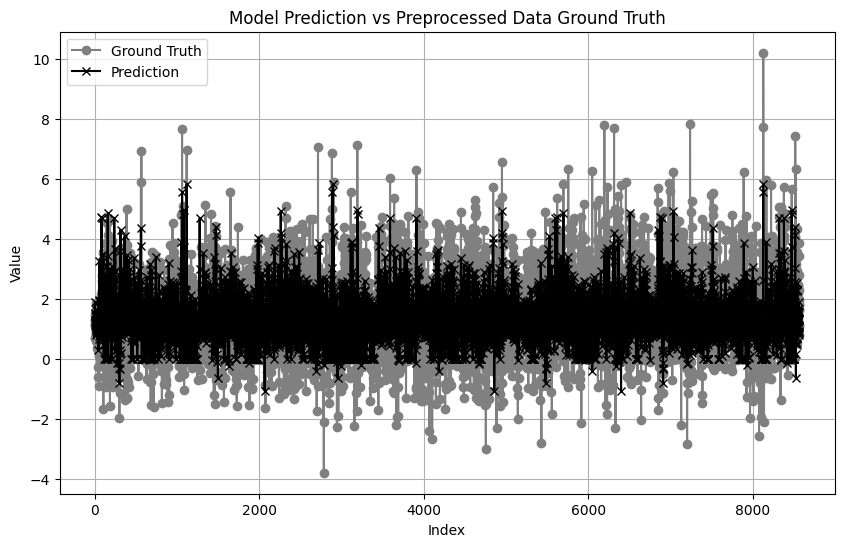

In [27]:
import matplotlib.pyplot as plt

# Sort the indices to ensure predictions and actual values are aligned
sorted_indices = X_test['Año'].argsort()

# Get the sorted predictions
y_pred_sorted = y_pred[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]

# Plot the actual values and predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Ground Truth', color='gray', marker='o')
plt.plot(y_pred_sorted, label='Prediction', color='black', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Model Prediction vs Preprocessed Data Ground Truth')
plt.legend()
plt.grid(True)
plt.show()

## Evaluación del modelo

In [28]:
from sklearn.metrics import mean_squared_error

# Predict on the test set X_test
y_pred = model.predict(X_test)

# Calculate the mean squared error y_test vs y_pred
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test data: {mse}')

Mean Squared Error on test data: 1.0979890895331468
